In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.

In [2]:
raw_csv_data=pd.read_csv('index_2018.csv')

In [3]:
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [4]:
df_comp=raw_csv_data.copy()

In [5]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
raw_csv_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
raw_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [8]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [9]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

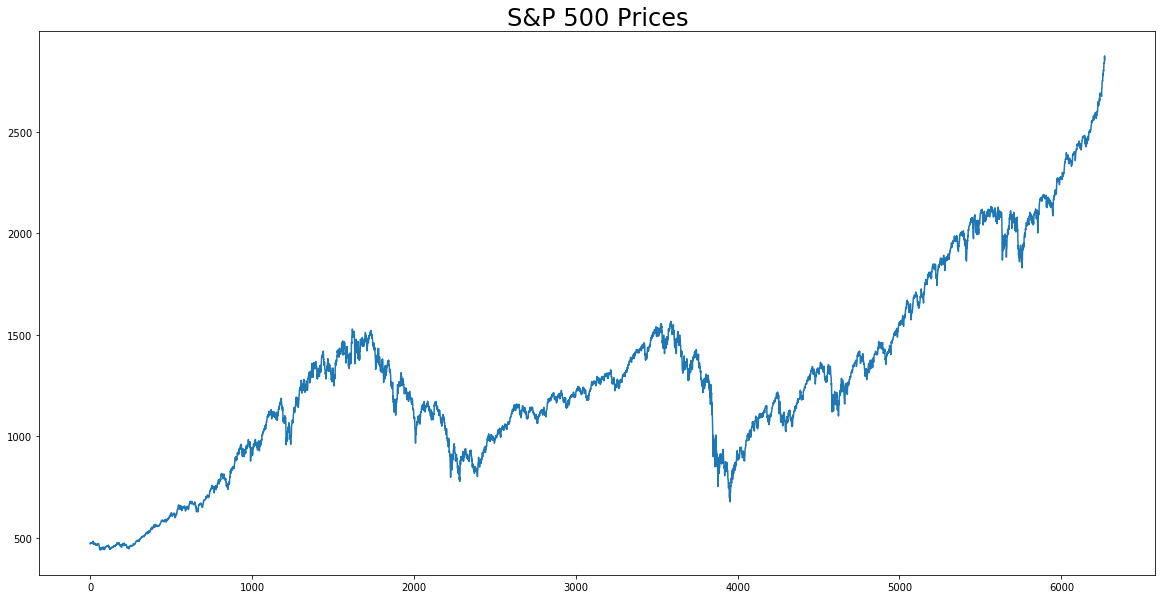

In [11]:
raw_csv_data.spx.plot(figsize=(20,10),title="S&P500 Prices")
plt.title("S&P 500 Prices", fontsize=24)
plt.show()

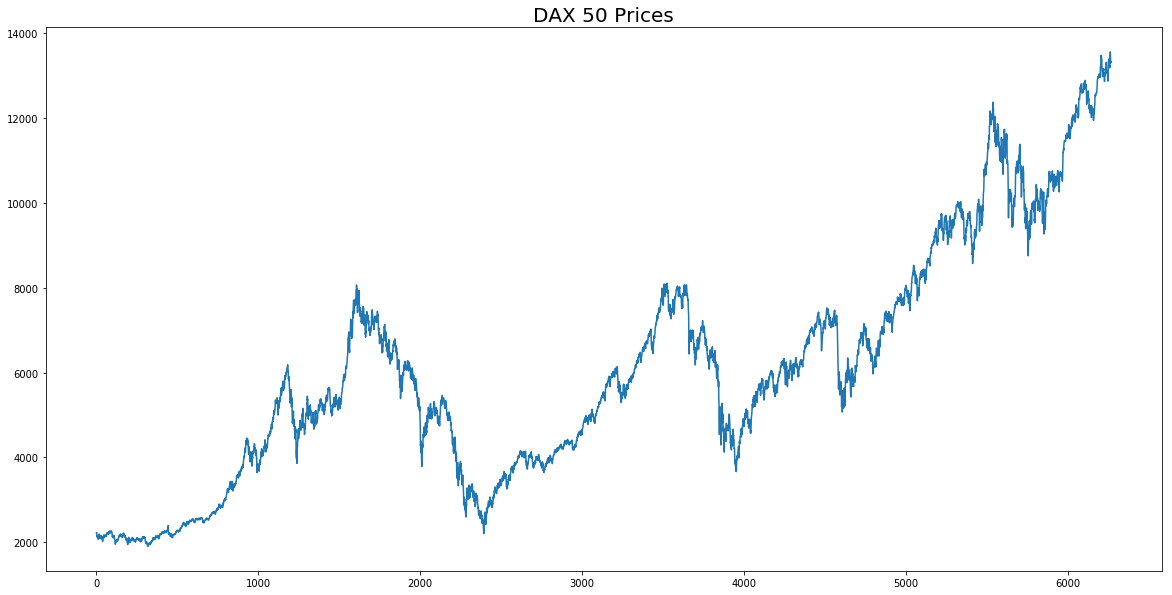

In [12]:
df_comp.dax.plot(figsize=(20,10))
plt.title("DAX 50 Prices", fontsize= 20)
plt.show()

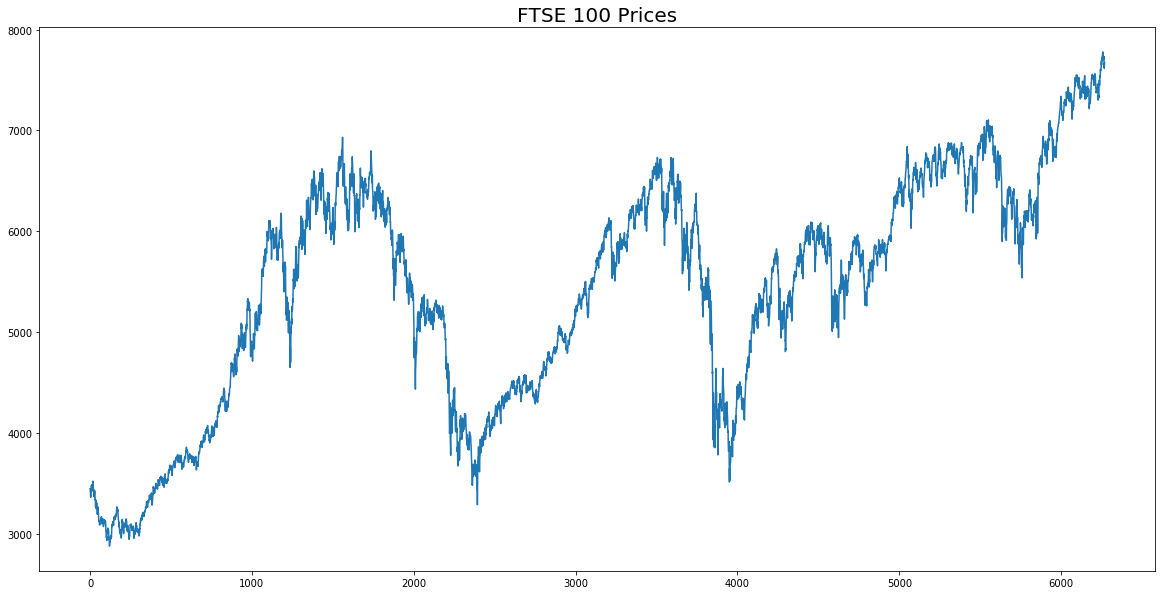

In [13]:
df_comp.ftse.plot(figsize=(20,10))
plt.title("FTSE 100 Prices", fontsize= 20)
plt.show()

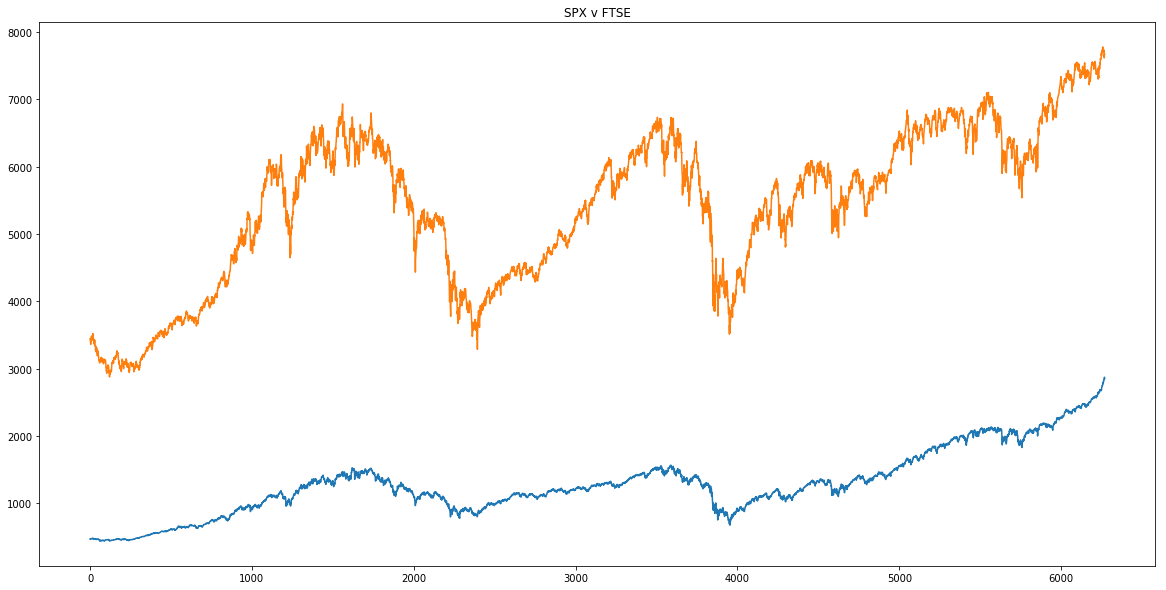

In [14]:
df_comp.spx.plot(figsize=(20,10),title="S&P500 Prices")
df_comp.ftse.plot(figsize=(20,10),title="FTSE100 Prices")
plt.title("SPX v FTSE")
plt.show()

QQ Plot

In [15]:
import scipy.stats
import pylab

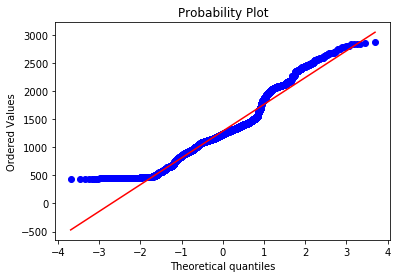

In [16]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

LENGTH OF THE TIME

In [17]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [18]:
df_comp.date.describe()

count           6269
unique          6269
top       23/09/2004
freq               1
Name: date, dtype: object

In [19]:
df_comp.date=pd.to_datetime(df_comp.date, dayfirst=True)

In [20]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

_*SETTING THE INDEX*_

In [22]:
df_comp.set_index("date", inplace=True)

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [24]:
df_comp = df_comp.asfreq('b')

In [25]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [26]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [27]:
df_comp.spx=df_comp.spx.fillna(method="ffill")

In [28]:
df_comp.ftse=df_comp.ftse.fillna(method="bfill")

In [29]:
df_comp.dax=df_comp.dax.fillna(value= df_comp.dax.mean())

In [30]:
df_comp.nikkei=df_comp.nikkei.fillna(method="ffill")

HOW TO DELETE?

In [31]:
df_comp['market_value']=df_comp.spx

In [32]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [33]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [34]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


SPILITTING OF DATA

In [35]:
size=int(len(df_comp)*0.8)

In [36]:
df=df_comp.iloc[:size]

In [37]:
df_test=df_comp.iloc[size:]

In [38]:
size

5021

*WHITE NOISE*

In [39]:
wn=np.random.normal(loc = df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [40]:
df['wn']=wn
import warnings


/Users/mansoor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.278256
std,292.559287,296.088109
min,438.920000,5.800990
25%,914.620000,887.428415
50%,1144.650000,1088.573979
75%,1316.280729,1293.968527
max,1570.252238,2014.903573


(0, 2300)

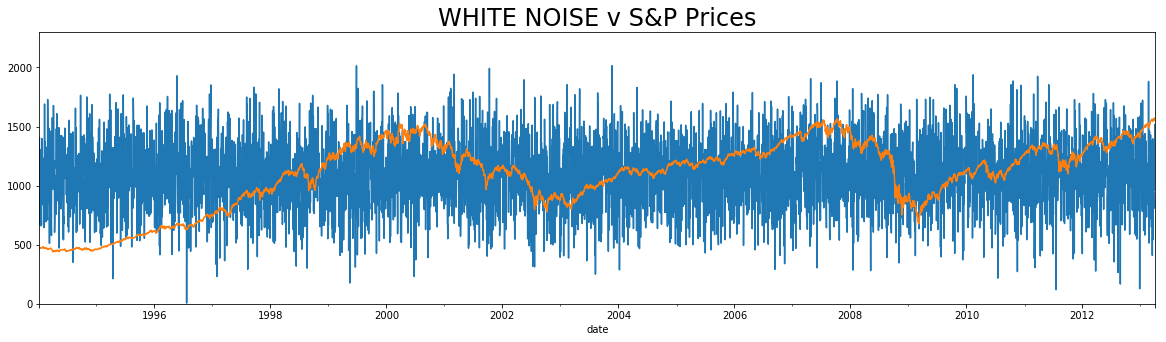

In [42]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size=24)
df.market_value.plot(figsize=(20,5))
plt.title("WHITE NOISE v S&P Prices", size=24)
plt.ylim(0,2300)

(0, 2300)

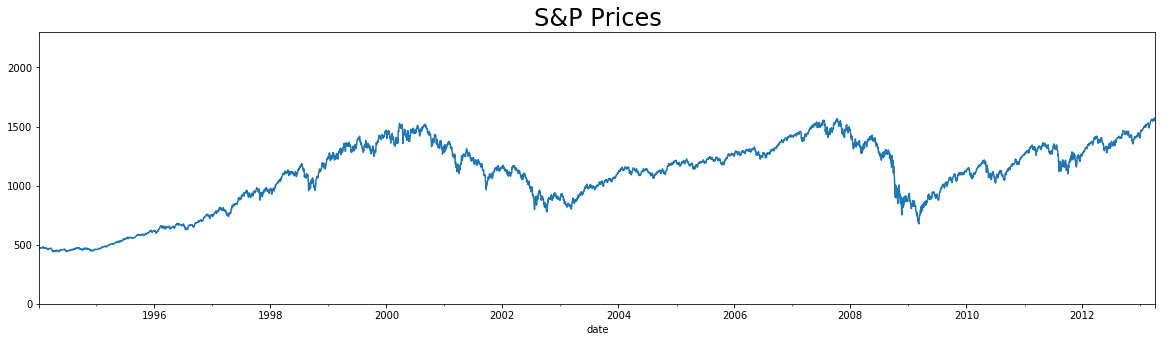

In [43]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim(0,2300)

In [44]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [45]:
sts.adfuller(df.wn)

(-70.28736152981169,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70933.28605524756)

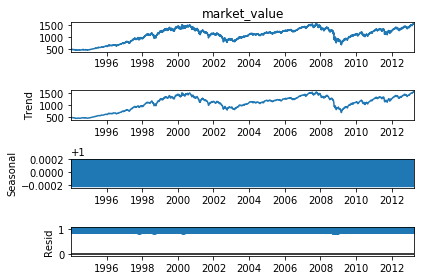

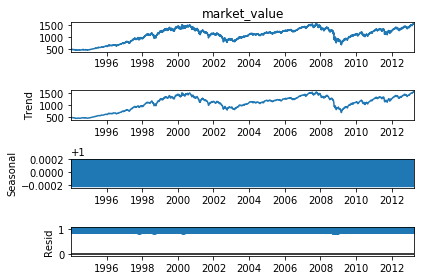

In [46]:
s_dec_additive = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_additive.plot()

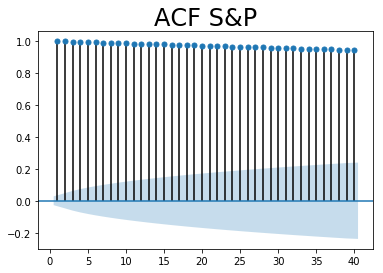

In [47]:
sgt.plot_acf(df.market_value, lags = 40, zero=False )
plt.title("ACF S&P", size=24)
plt.show()

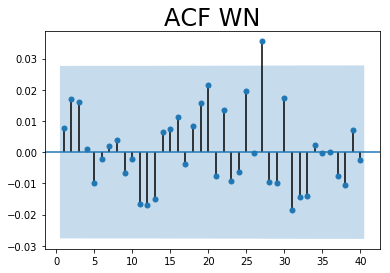

In [48]:
sgt.plot_acf(df.wn, lags = 40, zero=False )
plt.title("ACF WN", size=24)
plt.show()

Text(0.5,1,'PACF S&P')

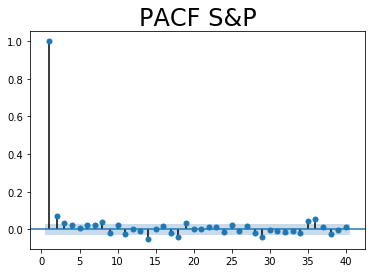

In [49]:
sgt.plot_pacf(df.market_value, lags= 40, zero= False, method=("ols"))
plt.title("PACF S&P", size=24)

Text(0.5,1,'WN S&P')

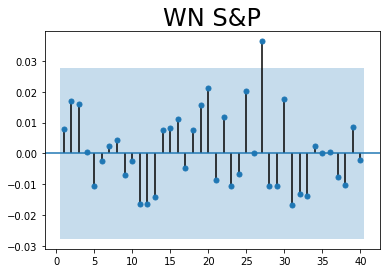

In [50]:
sgt.plot_pacf(df.wn, lags= 40, zero= False, method=("ols"))
plt.title("WN S&P", size=24)

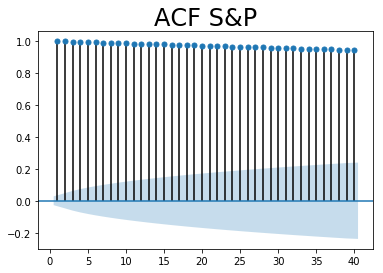

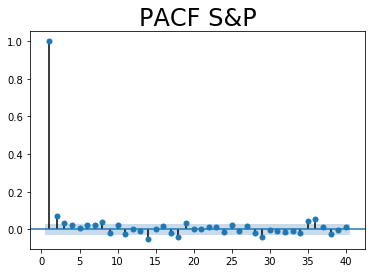

In [51]:
sgt.plot_acf(df.market_value, lags = 40, zero=False )
plt.title("ACF S&P", size=24)
plt.show()
sgt.plot_pacf(df.market_value, lags= 40,alpha = 0.05, zero= False, method=("ols"))
plt.title("PACF S&P", size=24)
plt.show()

In [52]:
model_ar = ARMA(df.market_value, order= (1,0))

In [53]:
results_ar = model_ar.fit()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

In [54]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Tue, 07 Apr 2020   AIC                          40200.777
Time:                        19:41:33   BIC                          40220.341
Sample:                    01-07-1994   HQIC                         40207.632
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.4609    229.571      4.589      0.000     603.509    1503.413
ar.L1.market_value     0.9994      0.001   1909.821      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
model_ar2 = ARMA(df.market_value, order= (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.280
Method:                       css-mle   S.D. of innovations             13.206
Date:                Tue, 07 Apr 2020   AIC                          40178.560
Time:                        19:41:34   BIC                          40204.645
Sample:                    01-07-1994   HQIC                         40187.701
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.3316    247.726      4.296      0.000     578.797    1549.866
ar.L1.market_value     0.9300      0.014     67.989      0.000       0.903       0.957
ar.L2.market_value     0.0694      0.014      5.073      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.3974           +0.0000j           14.3974            0.5000
-----------------------------------------------------------------------------
"""

In [56]:
model_ar3 = ARMA(df.market_value, order= (3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Tue, 07 Apr 2020   AIC                          40174.694
Time:                        19:41:35   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1050.9451    260.058      4.041      0.000     541.241    1560.650
ar.L1.market_value     0.9277      0.014     68.272      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0507           -5.3049j            5.4079           -0.2811
AR.3           -1.0507           +5.3049j            5.4079            0.2811
-----------------------------------------------------------------------------
"""

In [57]:
model_ar4 = ARMA(df.market_value, order= (4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 07 Apr 2020   AIC                          40174.511
Time:                        19:41:37   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1050.5041    266.520      3.942      0.000     528.135    1572.874
ar.L1.market_value     0.9269      0.014     68.598      0.000       0.900       0.953
ar.L2.market_value     0.0369      0.019      1.955      0.051   -9.94e-05       0.074
ar.L3.market_value     0.0148      0.019      0.771      0.440      -0.023       0.053
ar.L4.market_value     0.0208      0.014      1.477      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9306           -0.0000j            3.9306           -0.5000
AR.3            1.1090           -3.3123j            3.4930           -0.1986
AR.4            1.1090           +3.3123j            3.4930            0.1986
-----------------------------------------------------------------------------
"""

In [58]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [59]:
LLR_test(model_ar2, model_ar3)

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

0.015

In [60]:
model_ar4=ARMA(df.market_value, order= [4,0])
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print("LLR is: ", LLR_test(model_ar3, model_ar4))

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 07 Apr 2020   AIC                          40174.511
Time:                        19:41:41   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1050.5041    266.520      3.942      0.000     528.135    1572.874
ar.L1.market_value     0.9269      0.014     68.598      0.000       0.900       0.953
ar.L2.market_value  

In [61]:
model_ret_ma_1=ARMA(df.market_value[1:], order= (0,1))
results_ret_ma_1=model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood              -32317.174
Method:                       css-mle   S.D. of innovations            151.179
Date:                Tue, 07 Apr 2020   AIC                          64640.347
Time:                        19:41:44   BIC                          64659.911
Sample:                    01-10-1994   HQIC                         64647.202
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1091.7592      4.202    259.813      0.000    1083.523    1099.995
ma.L1.market_value     0.9696      0.003    363.246      0.000       0.964       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0314           +0.0000j            1.0314            0.5000
-----------------------------------------------------------------------------
"""

In [62]:
model_ret_arma_1=ARMA(df.market_value[1:], order= (1,1))
results_ret_arma_1=model_ret_arma_1.fit()
results_ret_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -20080.832
Method:                       css-mle   S.D. of innovations             13.204
Date:                Tue, 07 Apr 2020   AIC                          40169.663
Time:                        19:41:45   BIC                          40195.748
Sample:                    01-10-1994   HQIC                         40178.804
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1050.6311    251.732      4.174      0.000     557.245    1544.017
ar.L1.market_value     0.9995      0.000   2170.979      0.000       0.999       1.000
ma.L1.market_value    -0.0744      0.015     -5.106      0.000      -0.103      -0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
MA.1           13.4320           +0.0000j           13.4320            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
df['returns']=df.market_value.pct_change(1).mul(100)
df=df.iloc[1:]

/Users/mansoor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
sts.adfuller(df.returns)

(-17.0344571909812,
 8.280537020316706e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

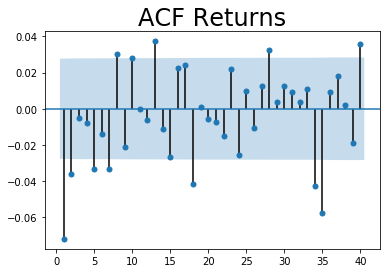

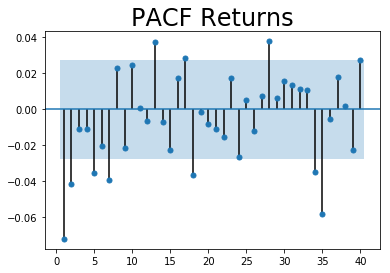

In [66]:
sgt.plot_acf(df.returns, lags = 40, zero=False )
plt.title("ACF Returns", size=24)
plt.show()
sgt.plot_pacf(df.returns, lags= 40,alpha = 0.05, zero= False, method=("ols"))
plt.title("PACF Returns", size=24)
plt.show()

In [67]:
model_ar5 = ARMA(df.returns, order= (1,0))
results_ar5 = model_ar5.fit()
results_ar5.summary()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8067.541
Method:                       css-mle   S.D. of innovations              1.207
Date:                Tue, 07 Apr 2020   AIC                          16141.081
Time:                        21:57:00   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.959      0.050   -1.03e-05       0.062
ar.L1.returns    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [68]:
model_ar6 = ARMA(df.returns, order= (2,0))
results_ar6 = model_ar6.fit()
results_ar6.summary()

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -8063.177
Method:                       css-mle   S.D. of innovations              1.206
Date:                Tue, 07 Apr 2020   AIC                          16134.354
Time:                        22:01:30   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.042      0.041       0.001       0.061
ar.L1.returns    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.returns    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8986           -0.2794
AR.2           -0.8987           +4.8154j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [70]:
model_ar7 = ARMA(df.returns, order= (3,0))
results_ar7 = model_ar7.fit()
print(results_ar7.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -8062.879
Method:                       css-mle   S.D. of innovations              1.206
Date:                Tue, 07 Apr 2020   AIC                          16135.758
Time:                        22:06:17   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.065      0.039       0.002       0.061
ar.L1.returns    -0.0754      0.014     -5.339      0.000      -0.103      -0.048
ar.L2.returns    -0.0425      0.014     

/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mansoor/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 